This notebook can be run on mybinder: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgricad-gitlab.univ-grenoble-alpes.fr%2Fchatelaf%2Fconference-ia/master?filepath=notebooks%2F/1_introduction/N2_Polynomial_Classification_Model_Complexity.ipynb)

In [1]:
# Import modules
%matplotlib inline
import matplotlib
import scipy as sp
import matplotlib.pyplot as plt
# Select random seed
random_state = 0

# Model Complexity

We make use of scikit pipeline mechanism to estimate linear classification of different order

In [2]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures

The PolynomialFeatures functions generates higher order polynoms from the initial samples. For instances, from (x_1, x_2) we could generate second order monomials (1, x_1, x_2, x_1x_2, x_1^2,x_2^2). It can be useful when the decision boundary is not linear.

## Generate data using sklearn toy functions

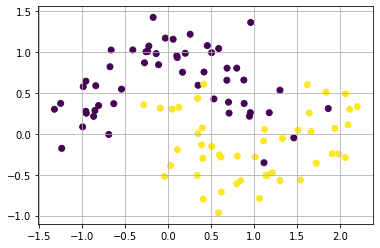

In [3]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=1000, random_state=random_state, noise=0.25)

from sklearn.model_selection import train_test_split
# We split the initial set in two sets: one, namely the training set, use for training the model, 
# and one, namely the test set, use to compute the validation error
# -> test_size x n_samples for the test set and n_samples x (1- test_size) for the training set
# where test_size is given as a parameter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state= random_state )
y_train[y_train==0]=-1
y_test[y_test==0]=-1

# Display the training set
plt.scatter(X_train[:,0], X_train[:,1],c=y_train)
plt.grid()

## Train the Least Squares Classifier with polynomial features

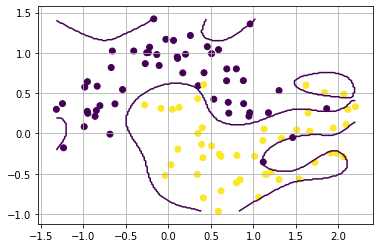

In [4]:
from sklearn import linear_model

# Train the Least Squares (Ridge) Classifier with polynomial features
degree = 12 # Degree of the polynomial 1 ->20
model = make_pipeline(PolynomialFeatures(degree), linear_model.RidgeClassifier(alpha=1e-6,normalize=True))
model.fit(X_train, y_train)

# Plot the decision functions
XX, YY = sp.meshgrid(sp.linspace(X_train[:,0].min(), X_train[:,0].max(),200),
                     sp.linspace(X_train[:,1].min(), X_train[:,1].max(),200))
XY = sp.vstack([ XX.flatten(), YY.flatten() ]).T
yp= model.predict(XY)
plt.contour(XX,YY,yp.reshape(XX.shape),[0])
plt.grid()
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)


### Exercise
Change the degree of the polynomial feature expansion for the previous example, e.g.  by gradually varying it  from 1,4,7  to 19, and visualize the shape of the decision boundary
 - do you think that a degree of 1, which gives a linear boundary (a straight line), is a satisfactory choice in this example?
 - conversely, what happens when the degree is 19 ?
 - By visual inspection, what value of the degree seems to be a good choice?

## Test error Vs Train Error

We can now measure, in a **quantitative way**, the influence of the polynom order on the classifification accuracy for **fresh** data, i.e. unseen during the training step. This gives us an estimate of the **test error**

Text(0, 0.5, 'Misclassification rate')

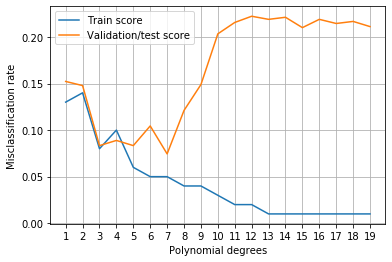

In [5]:
from sklearn.model_selection import validation_curve
lin_model = linear_model.RidgeClassifier(alpha=1e-6,normalize=True)

degrees= sp.arange(1,20)
train_error_rate= sp.zeros(degrees.shape)
test_error_rate= sp.zeros(degrees.shape)
for i,deg in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(deg), lin_model )
    model.fit(X_train,y_train )
    y_pred= model.predict( X_train )
    train_error_rate[i] = sp.mean( y_train != y_pred)
    y_pred= model.predict( X_test )
    test_error_rate[i] = sp.mean( y_test != y_pred)
    

#train_scores, valid_scores = validation_curve(pipe, X, y, "poly__degree", range(1,20), cv=10)
plt.plot(range(1, 20), train_error_rate, label="Train score")
plt.plot(range(1, 20), test_error_rate, label="Validation/test score")
plt.grid()
plt.xticks(range(1, 20))
plt.legend()
plt.xlabel("Polynomial degrees")
plt.ylabel("Misclassification rate")

### Exercise

 - In view of the results obtained, which values of the degree (or range of values) seem optimal?

 - Verify that these values give boudaries that seem coherent to you. Several simulations can be carried out by regenerating the data (changing the pseudo random algo seed, see the variable `random_state` in the first cell) in order to check the stability of the results.
